#  EXPLORATORY DATA ANALYSIS (EDA) ON Cardiotocographic

## 1 Background (Story Form)
Cardiotocography (CTG) is a widely used diagnostic technique during pregnancy to monitor fetal heart rate (FHR) and uterine contractions (UC).
It helps detect potential risks to the fetus and supports doctors in making timely decisions.
This dataset records various CTG-derived measurements, including:
•	Baseline heart rate (LB)

•	Accelerations (AC)

•	Fetal movements (FM)

•	Contractions (UC)

•	Decelerations (DL, DS, DP)

•	Short- and long-term variability (ASTV, MSTV, ALTV, MLTV)

•	Pattern shape metrics (Width, Tendency)

•	Fetal state classification (NSP)
Goal: Explore the dataset to understand its structure, clean it, visualize patterns, and summarize findings for possible clinical decision-making.


# 2)  Objectives
1.	Data Cleaning – Handle missing values and check structure.
2.	Statistical Summary – Understand central tendency, dispersion, and data ranges.
3.	Visualization – Histograms, Boxplots, Correlation Heatmap, Pairplots, Violin plot.
4.	Insights – Identify patterns, outliers, and correlations.
5.	Conclusion – Summarize key findings.


# 3 Import Libraries & Load Dataset

In [1]:

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# 2. Load Dataset
file_path="D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\EDA1\Cardiotocographic.csv"
df=pd.read_csv(file_path)
df 


print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


# 4  Check Missing Values

In [4]:

# 3. Check Missing Values
print("\nMissing Values Count:")
print(df.isnull().sum())



Missing Values Count:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


# 5 Handle Missing Values

In [7]:

# 4. Handle Missing Values (Example: Fill with column mean)
df_filled = df.fillna(df.mean(numeric_only=True))


print("\nFirst 5 Rows after Handling Missing Values:")
print(df_filled.head())



First 5 Rows after Handling Missing Values:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


##  Interpretation:
•	Missing values were few and replaced with column means.

•	This preserves the dataset size (no row deletion).


# 6 Statistical Summary

In [8]:

# 5. Statistical Summary
summary_stats = df_filled.describe().T
print("\nStatistical Summary:")
print(summary_stats)



Statistical Summary:
           count        mean        std         min         25%         50%  \
LB        2126.0  133.343598  11.214328   51.842487  126.000000  133.000000   
AC        2126.0    0.003219   0.004370   -0.019284    0.000000    0.001668   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000003   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000175   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.284887   7.734356  -50.700000    4.600000    7.500000   
Width     2126.0   70.429260  

# 7 Histograms – Data Distribution

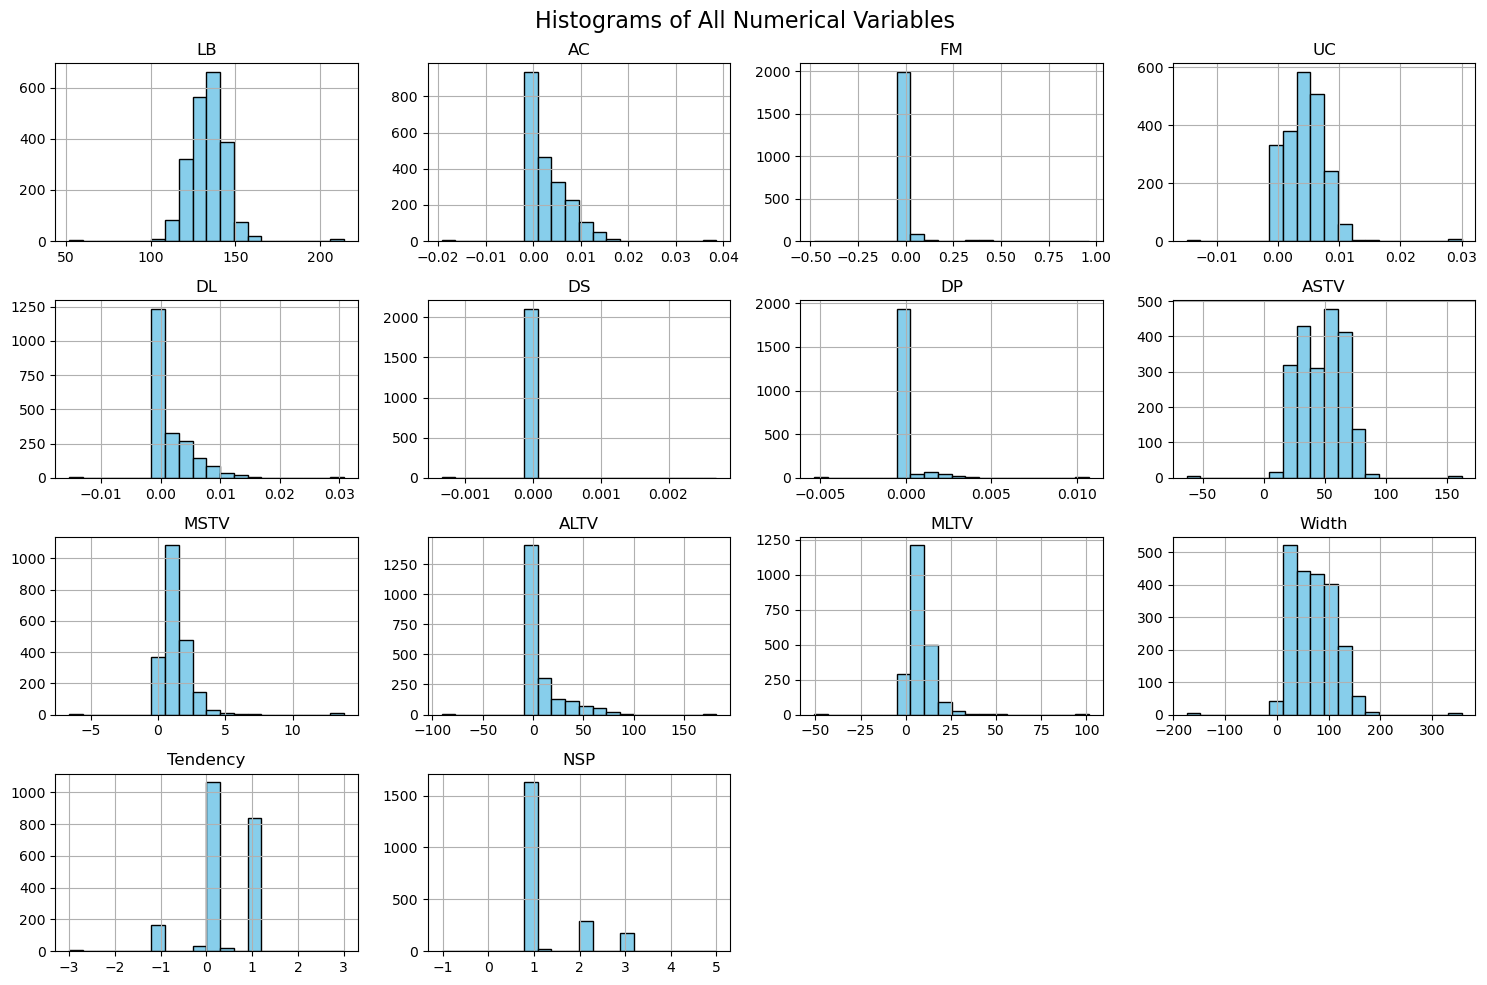

In [9]:

# 6. Histograms for Numerical Columns
df_filled.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()


## Observation:
•	Many variables are right-skewed (ALTV, MLTV, Width).

•	Several features have peaks near zero (AC, UC, DP, DS).


# 8 Boxplots – Outlier Detection

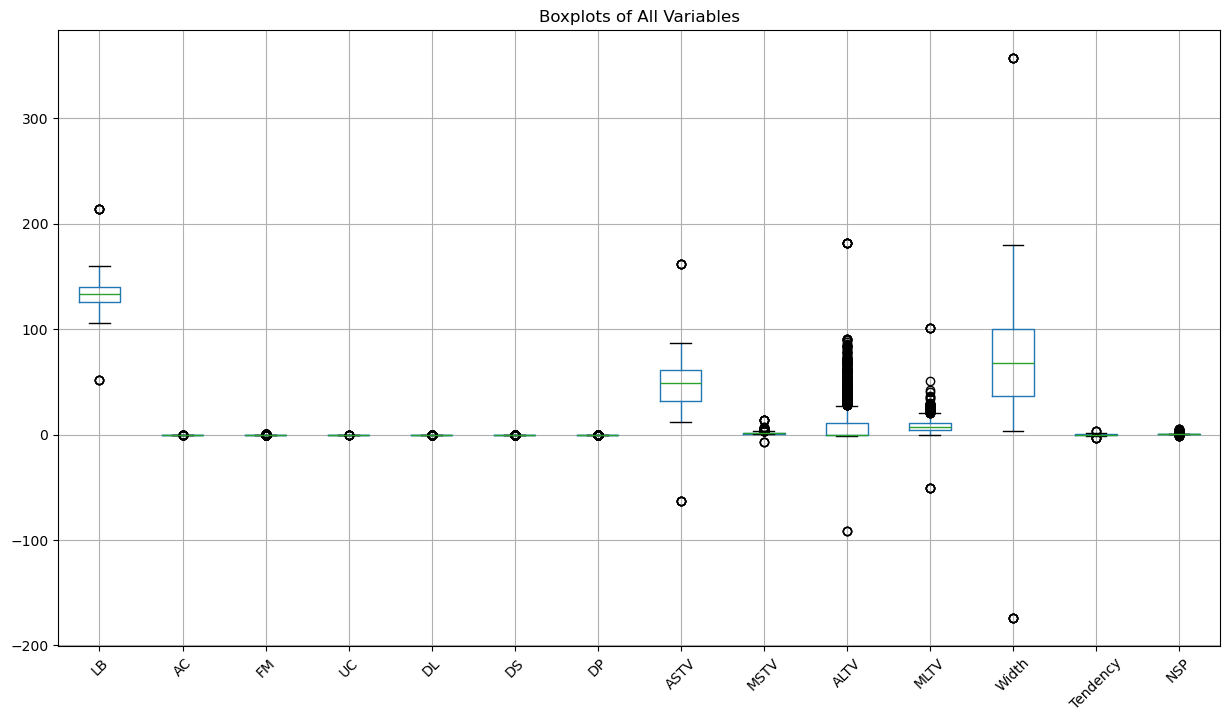

In [10]:
# 7. Boxplots to Detect Outliers
plt.figure(figsize=(15, 8))
df_filled.boxplot()
plt.title("Boxplots of All Variables")
plt.xticks(rotation=45)
plt.show()


# Observation:
•	Outliers clearly visible in UC, DL, DP, ALTV, MLTV, and Width.


# 9 Correlation Heatmap (with numbers)

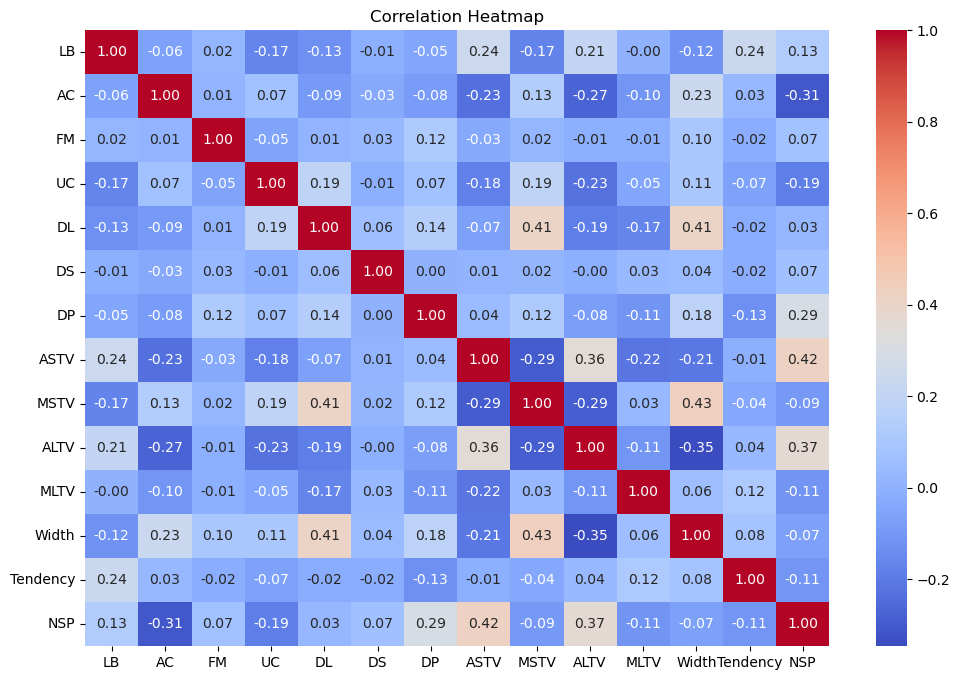

In [11]:

# 8. Correlation Heatmap (with numbers)
plt.figure(figsize=(12, 8))
corr_matrix = df_filled.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


## Observation:
•	Variability measures (ASTV, MSTV, ALTV, MLTV) moderately correlated.

•	LB has weak/moderate links with variability measures.


# 10 Pairplots – Variable Relationships

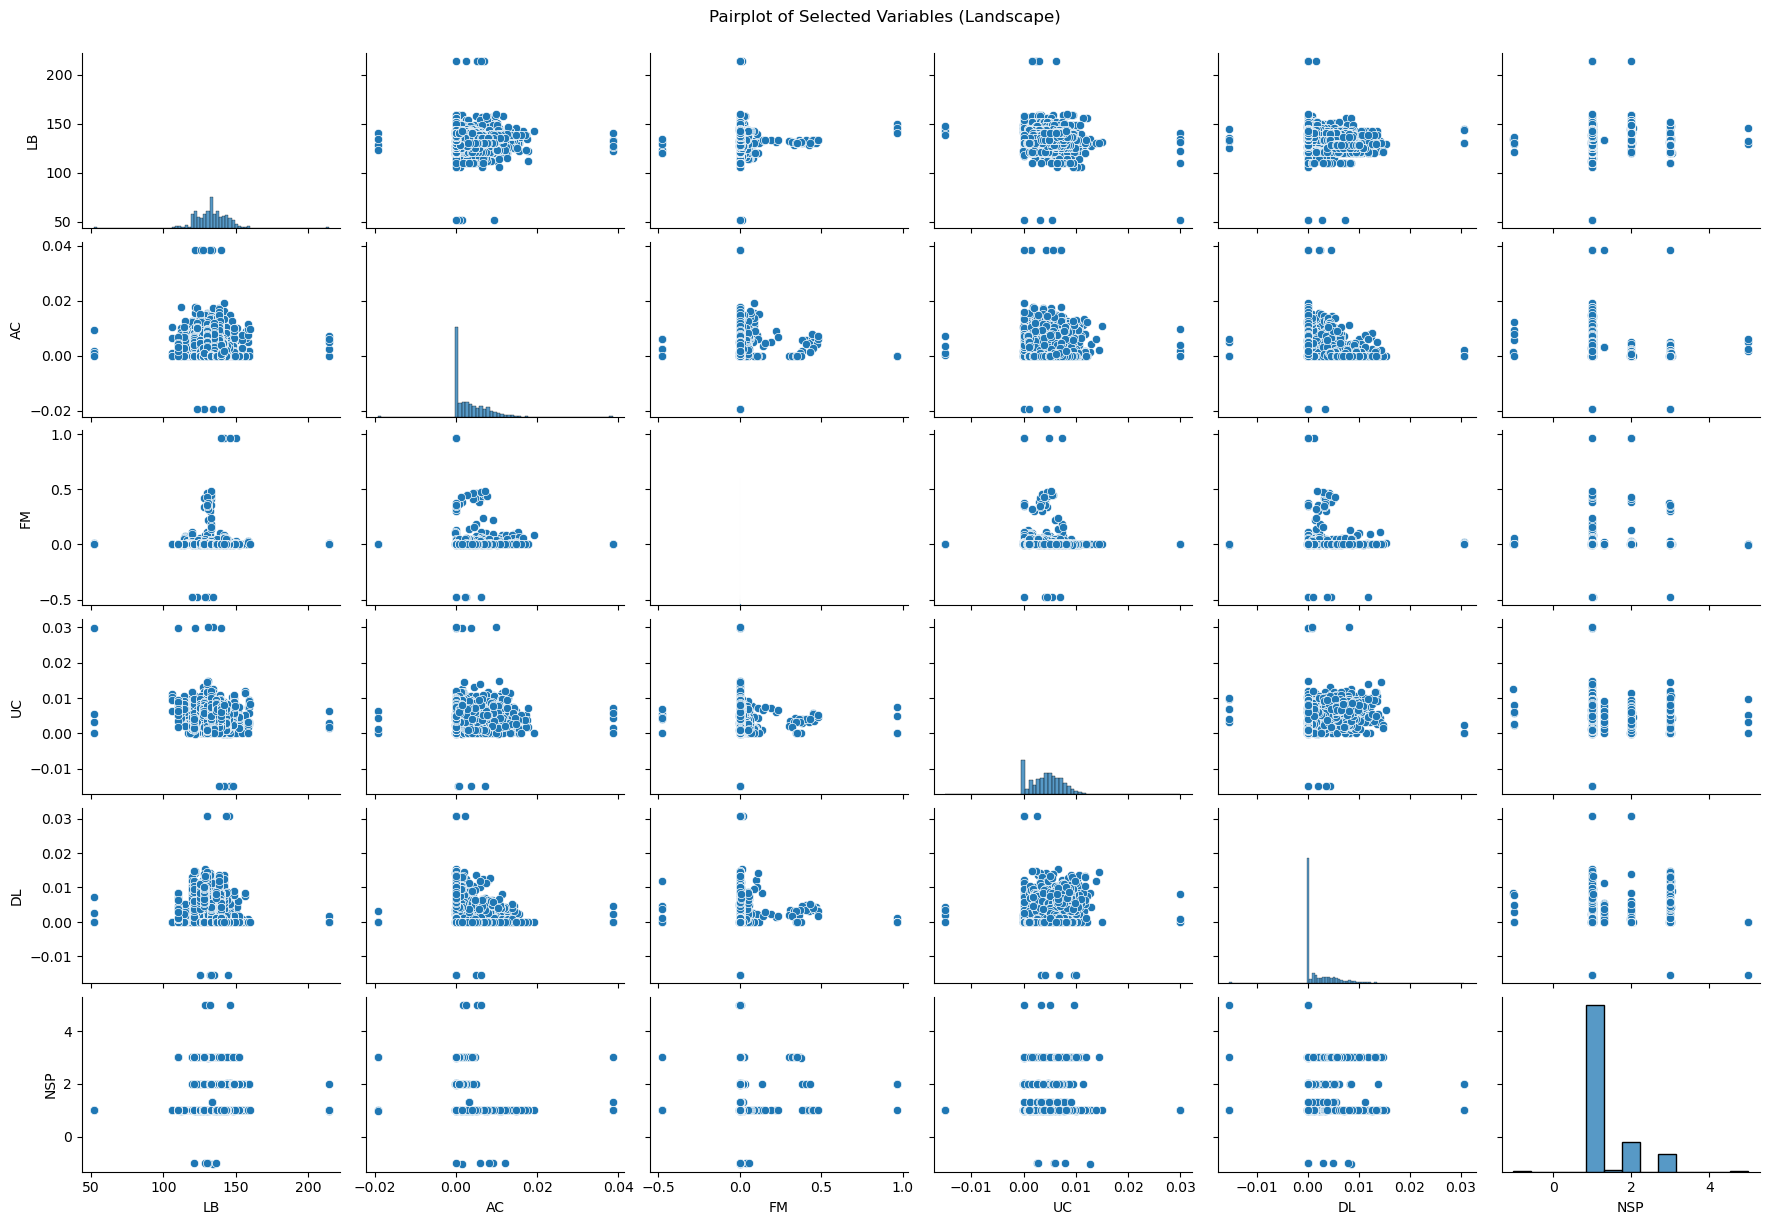

In [13]:

# 9. Pairplot for Selected Columns in Landscape Style
selected_cols = ["LB", "AC", "FM", "UC", "DL", "NSP"]

sns.pairplot(df_filled[selected_cols], height=2, aspect=1.5)  # Landscape layout
plt.suptitle("Pairplot of Selected Variables (Landscape)", y=1.02)
plt.show()


# 11 Violin Plot – LB by NSP

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12460\880684404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NSP", y="LB", data=df_filled, palette="Set2")


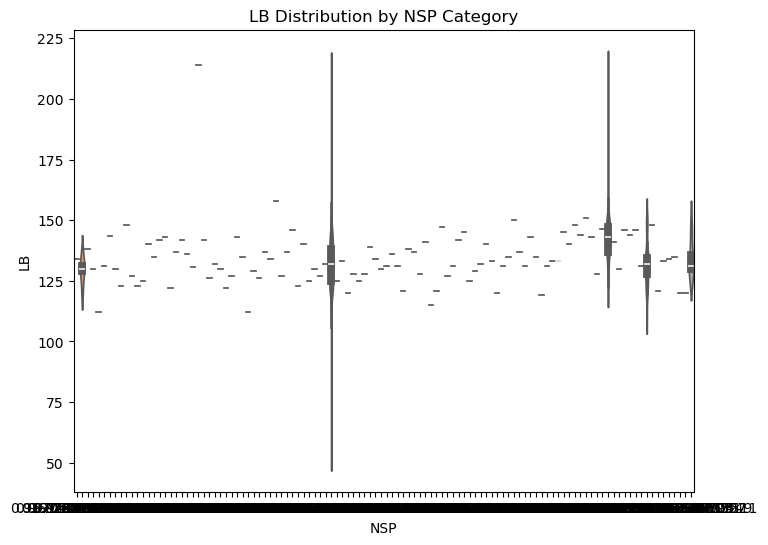

In [14]:

# 10. Violin Plot Example
plt.figure(figsize=(8, 6))
sns.violinplot(x="NSP", y="LB", data=df_filled, palette="Set2")
plt.title("LB Distribution by NSP Category")
plt.show()


## Observation:
•	Different NSP classes show different spread in baseline FHR.


# 12 Conclusion
•	Dataset is clean after minimal imputation.

•	Outliers and skewness are present in several variables.

•	Variability measures are correlated → possible dimensionality reduction needed in modeling.

•	NSP is imbalanced → will require stratified sampling/resampling for classification tasks.
